# Homework 2
***
* Assigned: 02/07
* Due: **02/20 at 11:59pm** electronically
* This assignment is worth 100 points.

**Please do read the instructions for each response carefully, since a whole lot of different variety of reponses are involved in the assignment (including pasting code snippets, writing executable code, small writeups). You don't wanna be losing points for silly errors.**

### Jupyter Notes:

* You **may** create new IPython notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!
  * you can press shift+enter to execute the code in the cell that your cursor is in.
* When you see `In [*]:` to the left of the cell you are executing, this means that the code / query is _running_. Please wait for the execution to complete
    * **If the cell is hanging- i.e. running for too long: you can restart the kernel**
    * To restart kernel using the menu bar: "Kernel >> Restart >> Clear all outputs & restart"), then re-execute cells from the top
* _Have fun!_


### Setup Your Credentials

Update the following variables

In [ ]:
# Your columbia uni that is used in SSOL
#
# IMPORTANT:  make sure this is consistent with the uni/alias used as your @columbia.edu email in SSOL
#
UNI = "bsv2111"

# your instabase username (if you go to the instabase homepage, your username should be in the URL)
USER = "bsv2111"

# your repository name containing 
REPO = "HW2"

# Data Processing

In this lab, you will use various types of tools -- from high-level tools like Data Wrangler to command line tools like `sed` and `awk` -- to perform data parsing and extraction from data encoded into a text file.  The goal of this lab is simply to gain experience with these tools and compare and contrast their usage.

The `lab` directory contains two datasets that you will work with:

1. A dataset of all the movies in 2013 from January to March (`2013films.txt`). It contains Movie name, Production house, Genre, Publisher and some other details.

1. The second dataset (`worldcup.txt`) is a snippet of the following Wikipedia webpage on [FIFA (Soccer) World Cup](http://en.wikipedia.org/wiki/FIFA_World_Cup).
Specifically it is a partially cleaned-up wiki source for the table toward the end of the page that lists teams finishing in the top 4. 

***
# 1. Get Wrangling !!
***
Download the [Trifacta Wrangler](https://www.trifacta.com/products/wrangler/) tool. Load both the datasets into wrangler and try playing around with the tool.

Some tips using Wrangler:

* Check out the introduction [video](https://vimeo.com/19185801) to get a feel of how wrangler works.
* You may wanna start off by loading ~50 lines of data instead of the entire files and play around with the tool.
* Wrangler responds to mouse highlights and clicks on the displayed table cells by suggesting operations on the left sidebar.  
* Hovering over each element shows the result in the table view.  
* Clicking adds the operation.  
* Clear the sidebar by clicking the colored row above the schema row.

## Tasks:

Use Data Wrangler for the following two datasets.  


### 2013films.txt

Use the tool to generate output as follows, i.e., Movie name, Production/Distribtuion house, Director, Genre and publisher. 

        'A dark truth, Magnolia Pictures, Damian Lee, Action,ComingSoon.net
         Table No. 21, Eros International, Aditya Datt, Thriller, BoxOfficeMojo.com
         ...
        
For the purpose of explanation columns are separated by ||. You can choose any pattern to extract information. 

1. Movie name can be identified as first column in every line formatted as ''[[ <movie name> ]]''  
1. Production/Distribution house is the following column that is formatted as [[< Production house>]]  
1. Director name can be identified with "(director)" tag that follows the name  
1. Genre is present in the next column but make sure to extract only second part that is separated by | operator. For eg. in [Action film|Action] relevant information is Action  
1. Publisher name can be identified in the last column with format "publisher=<publisher name>"  
1. It may help to skip first few lines that contains html code, so that you process actual records.

#### Questions

* Use wrangler to clean the data, then determine which Production/Distribution house produced maximum movies.
 
If we consider Production/ Distrubtion houses by unique values only then "Universal Studios" produced the most 
movies with 13. However if we consider Production/ Distrubtion houses that were joint productions as well (the 
ones with more than a single Production/ Distribution house listed) then adding in these it appears Warner Bro 
produced the moves movies with 20 that year.

#### Notes
* Your wrangler script is not expected to be sophisticated enough to generate the results for the question asked. It just needs to clean/combine the data enough for you to observe the data and answer the question.
* You can export the transformations you carried out in wrangler.
Export the script and paste it in the cell below. Do not bother executing it here in the notebook.
* Stanford also has an online open-source version of Trifacta Wrangler that can be used [here](http://vis.stanford.edu/wrangler/).

In [3]:
# your wrangler script goes in this cell below

delete row: matches([column1], `==`)
delete row: matches([column1], `style=`)
delete row: matches([column1], `\|-`)
delete row: matches([column1], `<!-- `)
delete row: matches([column1], `\{\| `)
delete row: matches([column1], `colspan=`)
delete row: matches([column1], `{start}! {alpha}{3}`)
replace col: column1 with: ', ' on: ` \|\| ` global: true
replace col: column1 with: 'director' on: `director/{lower}+` global: true
replace col: column1 with: '' on: ` \(film\)\|{alpha}+ {alpha}+` global: true
replace col: column1 with: '' on: ` \(2013 film+\)\|{alpha}+ {alpha}+ {alpha}+` global: true
replace col: column1 with: '' on: ` \(film\)\|{alpha}+` global: true
replace col: column1 with: '' on: ` \({digit}+ film\)\|{alpha}+ {alpha}+ {alpha}+` global: true
extract col: column1 on: `\(2013 film\)\|{alpha}+ {alpha}+`
replace col: column1 with: '' on: ` \({digit}+ film\)\|{alpha}+ {alpha}+` global: true
delete row: matches([column1], `<!--{any}+-->`)
replace col: column1 with: '' on: ` \({digit}+ film\)\|{alpha}+` global: true
replace col: column1 with: '(director)' on: `\(director\); [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '(director)' on: `\(director\) [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '(director)' on: `\(director\) [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '(director)' on: `\(director\) [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '(director)' on: `\(director\); Jimmy-sen \(screenplay\);` global: true
extract col: column1 on: `\(director\);` quote: '(director)'
replace col: column1 with: '(director)' on: `\(director\);` global: true
replace col: column1 with: '(director)' on: `\(director\) [[Deborah Kara Unger]], ` global: true
replace col: column1 with: '(director) [' on: `\(director\)[` global: true
replace col: column1 with: '(director)' on: `\({lower}+\) [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '(director)' on: `\({lower}+\) {alpha}+ {alpha}+,` global: true
replace col: column1 with: '(director)' on: `\({lower}+\) [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '' on: `{alpha}+ film\|` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `\(director\)` global: true
replace col: column1 with: '' on: ` \(film\)\|12 Years a Slave` global: true
delete row: matches([column1], `\|\+ "align=bottom" \|`)
replace col: column1 with: '' on: ` \(film\)\|21 & Over` global: true
replace col: column1 with: '' on: ` \(film\)\|42` global: true
replace col: column1 with: '' on: `\({lower}+\)` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[{alpha}+ {alpha}+]]` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> {alpha}+ {alpha}+ ;` global: true
replace col: column1 with: ' ' on: ` ; ` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>>,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[{alpha}+ {alpha}+]], [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: 'Lions Gate Entertainment' on: `Lions Gate Entertainment\|Lionsgate` global: true
replace col: column1 with: '' on: ` \|{alpha}+ {alpha}+` global: true
replace col: column1 with: '' on: ` \|Common` global: true
replace col: column1 with: '' on: ` <<DIRECTOR>>\|Eduardo Sánchez` global: true
replace col: column1 with: '' on: ` <<{upper}+>>\|{alpha}+ {alpha}+` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]], {alpha}+ {alpha}+ ` global: true
replace col: column1 with: '' on: `Huda,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>>[[Alexandra Daddario]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Tony Leung Chiu-Wai]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> {alpha}+ {alpha}+,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Nusrat Imroz Tisha,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]], [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Song Hye-kyo]], [[Chang Chen]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Zhao Benshan]], [[Yuen Woo-ping]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Xiaoshenyang]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Lo Hoi-pang]], [[Leung Siu-lung]], [[Julian Cheung]], [[Lo Mang]], [[Berg Ng]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+{alpha-numeric}+{lower}+]], [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Anthony Mackie]], [[Nick Nolte]], [[Wade Williams]], [[Mireille Enos]], [[Sullivan Stapleton]], [[Frank Grillo]],` global: true
replace col: column1 with: '' on: ` [[Cedric the Entertainer]], [[Alanna Ubach]], Jamie Noel,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: ',' on: ` ,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '' on: ` Romantic Comedy` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Polly Bergen]], [[Dermot Mulroney]], [[Allie Grant]], [[Ashley Rickards]], [[Robbie Amell]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]], [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: 'MGM' on: `Metro-Goldwyn-Mayer\|MGM` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Rainer Bock]], [[Monique Ganderton]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Clifton Collins, Jr.]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+-{alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+{alpha-numeric}+{lower}+]], [[{upper}+{alpha-numeric}+{lower}+ {alpha}+{alpha-numeric}+{lower}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> [[{alpha}+ {alpha}+]],` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> [[Alona Tal]], [[Jeffrey Wright]], Catherine Kim Poon, [[Justin Chambers]], [[Alona Tal]],` global: true
replace col: column1 with: '' on: `\| \'\'[[` global: true
replace col: column1 with: '' on: `]]\'\'` global: true
replace col: column1 with: '' on: `[[` global: true
replace col: column1 with: '' on: `]]` global: true
replace col: column1 with: '<<PUBLISHER>>' on: `<center><ref>{any}+ publisher=` global: true
replace col: column1 with: '' on: `\}\}</ref></center>` global: true
replace col: column1 with: '' on: ` \| accessdate={digit}+-{digit}+-{digit}+{end}`
replace col: column1 with: '' on: ` \| url=http://{any}+`
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> {alpha}+ {alpha}+, {alpha}+ {alpha}+,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> {alpha}+ {alpha}+,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Carrie-Anne Moss,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<<{upper}+>> {alpha}+ {alpha}+, {alpha}+ {alpha}+, {alpha}+ {alpha}+,` global: true
replace col: column1 with: '<<DIRECTOR>>' on: `<DIRECTOR>> Julie Bowen, Jennifer Morrison, Amanda Crew, Saffron Burrows, Shirley Manson, Davey Havok,` global: true
replace col: column1 with: '<<' on: `<<<` global: true
split col: column1 on: `<<{upper}+>> {alpha}+ {alpha}+ {alpha}+,` quote: '<<DIRECTOR>>' after: ` ` before: ` `
replace col: column4 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Scott Z.` global: true
replace col: column4 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Burns Rooney Mara, Jude Law, Channing Tatum, Catherine Zeta-Jones, Vinessa Shaw, David Costabile,` global: true
replace col: column4 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Common, Dennis Haysbert, Danny Glover, Charles S. Dutton, Meagan Good,` global: true
replace col: column4 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Jonathan van Tulleken Steve Baker, Will Carlough, Matt Portenoy, Greg Pritikin, Rocky Russo, Jeremy Sosenko, Elizabeth Wright Shapiro Hugh Jackman, Emma Stone, Gerard Butler, Chloë Grace Moretz, Elizabeth Banks, Kristen Bell, Naomi Watts, Anna Faris, Chris Pratt, Kate Winslet, Josh Duhamel, Richard Gere, Uma Thurman, Halle Berry, Patrick Warburton, Christopher Mintz-Plasse, Liev Schreiber, Seann William Scott, Jason Sudeikis, Kate Bosworth, Bobby Cannavale, Justin Long, J. B. Smoove, Kieran Culkin, Leslie Bibb, Terrence Howard, Jack McBrayer, Tony Shalhoub, Matt Walsh, Stephen Merchant, Jimmy Bennett, Emily Alyn Lind, Jeremy Allen White,` global: true
replace col: column4 with: '<<DIRECTOR>>' on: `<<DIRECTOR>> Jack Epps Jr. Tom Cruise,` global: true
replace col: column4 with: ', ' on: `\|\|` global: true
delete row: matches([column4], `\|\}`)
split col: column4 on: ',' limit: 3
replace col: column6 with: '' on: `\|Universal Pictures` global: true
replace col: column6 with: '' on: `{start}{delim}`
sort order: column6
aggregate value: count() group: column6

SyntaxError: invalid syntax (<ipython-input-3-951f850aa102>, line 10)

### worldcup.txt

Use the tool to generate output as follows, i.e., each line in the output contains a country, a year, and the position of the county in that year (if within top 4).

        BRA, 1962, 1
        BRA, 1970, 1
        BRA, 1994, 1
        BRA, 2002, 1
        BRA, 1958, 1
        BRA, 1998, 2
        BRA, 1950, 2
        ...

It may help to 

1. Skip the first 20 or so rows of table headers and other text, so that the data wrangler works with are "record text".  
2. Delete the rows that are clearly HTML formatting content
3. Extract the relevant data from the remaining column into new columns
4. Use the fill operation

#### Questions

* According to the dataset, how often has each country won the world cup?


* BRA has won 5/19 times for the years listed
* ITA has won 4/19 times for the years listed
* GER has won 3/19 times for the years listed
* ARG has won 2/19 times for the years listed
* URU has won 2/19 times for the years listed
* FRA has won 1/19 times for the years listed
* ENG has won 1/19 times for the years listed
* ESP has won 1/19 times for the years listed
* All others won 0/19 times for the years listed


#### Notes
* Your wrangler script is not expected to be sophisticated enough to generate the results for the question asked. It just needs to clean/combine the data enough for you to observe the data and answer the question.
* You can export the transformations you carried out in wrangler. Export the script and paste it in the cell below. Do not bother executing it here in the notebook.

In [4]:
# your wrangler script goes in this cell below

replace col: column1 with: '' on: `bgcolor=\#FFF68F\|` global: true
delete row: matches([column1], `\|-`)
replace col: column1 with: '<<COUNTRY>>' on: `\|\{\{fb\|` global: true
replace col: column1 with: '<<\/COUNTRY>>' on: `\}\}` global: true
replace col: column1 with: '' on: `[[\#2\|^]]` global: true
replace col: column1 with: '[[' on: `[[{digit}{4} {upper}{4} {alpha}{5} {alpha}{3}\|` global: true
replace col: column1 with: '' on: `[[\#1\|\*]]` global: true
replace col: column1 with: '' on: `<sup>[[\#3\|\#]]</sup>` global: true
replace col: column1 with: '' on: `\*` global: true
delete row: matches([column1], `<div`)
replace col: column1 with: '|0' on: `\|align=center\| —` global: true
replace col: column1 with: '' on: `[[` global: true
replace col: column1 with: '' on: `]]` global: true
replace col: column1 with: '' on: `<<COUNTRY>>` global: true
replace col: column1 with: '' on: `<</COUNTRY>>` global: true
delete row: matches([column1], `! T`)
replace col: column1 with: '' on: `{start}{delim}`
replace col: column1 with: '' on: ` ` global: true
split col: column1 on: `\(`
replace col: column3 with: '' on: `\)` global: true
replace col: column3 with: '[' on: `{start}`
replace col: column3 with: ']' on: `{end}`

SyntaxError: invalid syntax (<ipython-input-4-64e7b931cdab>, line 15)

***
# 2. Grep, Sed & Awk
***

The set of three UNIX tools, sed, awk, and grep, can be very useful for quickly cleaning up and transforming data for further analysis (and have been around since the inception of UNIX). In conjunction with other unix utilities like sort, uniq, tail, head, etc., you can accomplish many simple data parsing and cleaning tasks with these tools. You are encouraged to play with these tools and familiarize yourselves with the basic usage of these tools.

# grep

```bash
grep 'regexp' filename
```

or equivalently (using UNIX pipelining):

```bash
cat filename | grep 'regexp'
```

The output contains only those lines from the file that match the regular expression. Two options to grep are useful: grep -v will output those lines that do not match the regular expression, and grep -i will ignore case while matching. See the manual (man grep) (or online resources) for more details.

# sed

Sed stands for stream editor. Basic syntax for sed is:

```bash
sed 's/regexp/replacement/g' filename
```

For each line in the intput, the portion of the line that matches regexp (if any) is replaced with replacement. Sed is quite powerful within the limits of operating on single line at a time. You can use \( \) to refer to parts of the pattern match. In the first sed command above, the sub-expression within \( \) extracts the user id, which is available to be used in the replacement as \1.

# awk

Finally, awk is a powerful scripting language (not unlike perl). The basic syntax of awk is:

```bash
awk -F',' 'BEGIN{commands} /regexp1/ {command1} /regexp2/ {command2} END{commands}'
```

For each line, the regular expressions are matched in order, and if there is a match, the corresponding command is executed (multiple commands may be executed for the same line). BEGIN and END are both optional. The -F',' specifies that the lines should be split into fields using the separator ",", and those fields are available to the regular expressions and the commands as $1, $2, etc. See the manual (man awk) or online resources for further details.

# EXAMPLES

#### Note
There's nothing to submit in the examples section. Task to carry out and submit will follow after this section. Just play around and get a hang of the bash commands described here

***

We start off by copying the files from our instabase repository to the VM filesystem our instabse instance is running on.
Remember, you'll have to execute the cell below everytime the VM is restarted (happens when you close and restart the notebook) before you can proceed with the bash examples that follow.

In [1]:
with ib.open("labor.csv") as f:
    labor=f.read()
with ib.open("crime-clean.txt") as f:
    crime_clean=f.read()
with ib.open("crime-unclean.txt") as f:
    crime_unclean=f.read()

open('/tmp/labor.csv','w').write(labor)
open('/tmp/crime-clean.txt','w').write(crime_clean)
open('/tmp/crime_unclean.txt','w').write(crime_unclean)


A few examples to give you a flavor of the tools and what one can do with them.

* Perform the equivalent of wrap on labor.csv (i.e., merge consecutive groups of lines referring to the same record)

In [75]:
%%bash 

cat /tmp/labor.csv \
| awk '/^Series Id:/ {print combined; combined = $0} !/^Series Id:/ {combined = combined", "$0;} END {print combined}'


Series Id: LNU02000000, Series title: (Unadj) Employment Level, Labor force status: Employed, Type of data: Number in thousands, Age: 16 years and over
Series Id: LNU03000000, Series title: (Unadj) Unemployment Level, Labor force status: Unemployed, Type of data: Number in thousands, Age: 16 years and over
Series Id: LNU04000000, Series title: (Unadj) Unemployment Level, Labor force status: Unemployed, Type of data: Number in thousands, Age: 16 years and over
Series Id: LNU02032201, Series title: (Unadj) Employment Level - Management, Professional, and Related Occupations, Labor force status: Employed, Type of data: Number in thousands, Age: 16 years and over, Occupation: Management, professional, and related occupations (0008-3540)
Series Id: LNU05000000, Series title: (Unadj) Unemployment Level, Labor force status: Unemployed, Type of data: Number in thousands, Age: 16 years and over
Series Id: LNU03032215, Series title: (Unadj) Unemployment Level - Management, Professional, and Rel

*Note that all bash cells begin with **%%bash**. This indicates that, what follows is a bash code/script.*


* On crime-clean.txt, the following command does a fill (first row of output: "Alabama, 2004, 4029.3".

In [141]:
%%bash 

cat /tmp/crime-clean.txt \
| grep -v '^,$' \
| awk '/^[A-Z]/ {state = $4} !/^[A-Z]/ {print state, $0}'
#cat crime-clean.txt | grep -v '^,$' | awk '/^[A-Z]/ {state = $4} !/^[A-Z]/ {print state, $0}'

Alabama, 2004,4029.3
Alabama, 2005,3900
Alabama, 2006,3937
Alabama, 2007,3974.9
Alabama, 2008,4081.9
Alaska, 2004,3370.9
Alaska, 2005,3615
Alaska, 2006,3582
Alaska, 2007,3373.9
Alaska, 2008,2928.3
Arizona, 2004,5073.3
Arizona, 2005,4827
Arizona, 2006,4741.6
Arizona, 2007,4502.6
Arizona, 2008,4087.3
Arkansas, 2004,4033.1
Arkansas, 2005,4068
Arkansas, 2006,4021.6
Arkansas, 2007,3945.5
Arkansas, 2008,3843.7
California, 2004,3423.9
California, 2005,3321
California, 2006,3175.2
California, 2007,3032.6
California, 2008,2940.3
Colorado, 2004,3918.5
Colorado, 2005,4041
Colorado, 2006,3441.8
Colorado, 2007,2991.3
Colorado, 2008,2856.7
Connecticut, 2004,2684.9
Connecticut, 2005,2579
Connecticut, 2006,2575
Connecticut, 2007,2470.6
Connecticut, 2008,2490.8
Delaware, 2004,3283.6
Delaware, 2005,3118
Delaware, 2006,3474.5
Delaware, 2007,3427.1
Delaware, 2008,3594.7
District 2004,4852.8
District 2005,4490
District 2006,4653.9
District 2007,4916.3
District 2008,5104.6
Florida, 2004,4182.5
Florida, 2005

* On crime-clean.txt, the following script cleans the data. The following works assuming perfectly homogenous data (as the example on the Wrangler website is).

In [ ]:
%%bash

cat /tmp/crime-clean.txt |grep -v '^,$' | sed 's/,$//g; s/Reported crime in //; s/[0-9]*,//' | awk -F',' 'BEGIN {printf "State, 2004, 2005, 2006, 2007, 2008"} /^[A-Z]/ {print c; c=$0}  !/^[A-Z]/ {c=c", "$0;}  END {print c}'


* On crime-unclean.txt the follow script perfroms the same cleaning as above, but allows incomplete information (e.g., some years may be missing).

In [2]:
%%bash

cat /tmp/crime_unclean.txt | grep -v '^,$' | sed 's/Reported crime in //;' | 
        awk -F',' 'BEGIN {printf "State, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008\n"} /^[A-Z]/ || /^$/ { if(state) { printf(state); for(i = 2000; i <= 2008; i++) { if(array[i]) {printf("%s,", array[i])} else {printf("0,")} }; printf("\n");} state=$0; delete array} !/^[A-Z]/ {array[$1] = $2}'

State, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008
Alabama,0,0,0,0,4029.3,0,0,3974.9,4081.9,
Alaska,0,0,0,0,3370.9,3615,3582,3373.9,2928.3,
Arizona,0,0,0,0,5073.3,4827,4741.6,4502.6,4087.3,
Arkansas,0,0,0,0,4033.1,4068,4021.6,3945.5,3843.7,
California,0,0,0,0,3423.9,3321,3175.2,3032.6,2940.3,
Colorado,0,0,0,0,3918.5,4041,3441.8,2991.3,2856.7,
Connecticut,0,0,0,0,2684.9,2579,2575,2470.6,2490.8,
Delaware,0,0,0,0,3283.6,3118,3474.5,3427.1,3594.7,
District of Columbia,0,0,0,0,4852.8,4490,4653.9,4916.3,5104.6,
Florida,0,0,0,0,4182.5,4013,3986.2,4088.8,4140.6,
Georgia,0,0,0,0,4223.5,4145,3928.8,3893.1,3996.6,
Hawaii,0,0,0,0,4795.5,4800,4219.9,4119.3,3566.5,
Idaho,0,0,0,0,2781,2697,2386.9,2264.2,2116.5,
Illinois,0,0,0,0,3174.1,3092,3019.6,2935.8,2932.6,
Indiana,0,0,0,0,3403.6,3460,3464.3,3386.5,3339.6,
Iowa,0,0,0,0,2904.8,2845,2870.3,2648.6,2440.5,
Kansas,0,0,0,0,4015.5,3806,3858.5,3693.8,3397,
Kentucky,0,0,0,0,2540.2,2531,2621.9,2524.6,2677.1,
Louisiana,0,0,0,0,4419.1,3696,4088.5,41

We provided the last example to show how powerful awk can be. However if you need to write a long command like this, you may be better off using a proper scripting language like perl or python!

# Finally, the tasks.

* Use the awk "split" function and "for loop" constructs on World Cup data, to again generate output as follows, i.e., each line in the output contains a country, a year, and the position of the county in that year (if within top 4).

        BRA, 1962, 1
        BRA, 1970, 1
        BRA, 1994, 1
        BRA, 2002, 1
        BRA, 1958, 1
        BRA, 1998, 2
        BRA, 1950, 2
        ...

* Start with the given script that cleans up the data a little bit.
* No need to re-answer the questions in the Wrangler section, but recompute them to ensure your answers are consistent.

In [5]:
with ib.open("worldcup.txt") as f:
    world_cup=f.read()
    
open('/tmp/worldcup.txt','w').write(world_cup)

In [248]:
%%bash 

cat /tmp/worldcup.txt \
| sed 's/\[\[\([0-9]*\)[^]]*\]\]/\1/g; s/.*fb|\([A-Za-z]*\)}}/\1/g; s/<sup><\/sup>//g; s/|bgcolor[^|]*//g; s/|align=center[^|]*//g' \
| grep -v '^|-$' \
| grep -v '^!' \
| grep -v '^:<div' \
| awk '{gsub(/\|[0-9]?[0-9]?/,"-"(NR-1)%6"-");}1' \
| grep -v '^5$' \
| awk '/^[A-Z]/ {state = $0} !/^[A-Z]/ {print state, $0}' \
| awk '{gsub(/\(|\)/,"")}1' \
| awk '{gsub(/,/,", "$1""$2)}1' \
| awk '{gsub(/ /, ""); print $0}' \
| awk '{gsub(/,/,", ")}1' \
| awk '{for (i=1;i<=NF;i++) print $i}' \
| awk '{gsub(/,/,"")}1' \
| awk '{split($0,a,"-"); print a[1],a[3],a[2]}' \
| awk '{gsub(/ /, ", "); print $0}' \
| grep -v ', ,' \
| grep -v '—,' \

BRA, 1958, 1
BRA, 1962, 1
BRA, 1970, 1
BRA, 1994, 1
BRA, 2002, 1
BRA, 1950, 2
BRA, 1998, 2
BRA, 1938, 3
BRA, 1978, 3
BRA, 1974, 4
ITA, 1934, 1
ITA, 1938, 1
ITA, 1982, 1
ITA, 2006, 1
ITA, 1970, 2
ITA, 1994, 2
ITA, 1990, 3
ITA, 1978, 4
GER, 1954, 1
GER, 1974, 1
GER, 1990, 1
GER, 1966, 2
GER, 1982, 2
GER, 1986, 2
GER, 2002, 2
GER, 1934, 3
GER, 1970, 3
GER, 2006, 3
GER, 2010, 3
GER, 1958, 4
ARG, 1978, 1
ARG, 1986, 1
ARG, 1930, 2
ARG, 1990, 2
URU, 1930, 1
URU, 1950, 1
URU, 1954, 4
URU, 1970, 4
URU, 2010, 4
FRA, 1998, 1
FRA, 2006, 2
FRA, 1958, 3
FRA, 1986, 3
FRA, 1982, 4
ENG, 1966, 1
ENG, 1990, 4
ESP, 2010, 1
ESP, 1950, 4
NED, 1974, 2
NED, 1978, 2
NED, 2010, 2
NED, 1998, 4
TCH, 1934, 2
TCH, 1962, 2
HUN, 1938, 2
HUN, 1954, 2
SWE, 1958, 2
SWE, 1950, 3
SWE, 1994, 3
SWE, 1938, 4
POL, 1974, 3
POL, 1982, 3
AUT, 1954, 3
AUT, 1934, 4
POR, 1966, 3
POR, 2006, 4
USA, 1930, 3
CHI, 1962, 3
CRO, 1998, 3
TUR, 2002, 3
YUG, 1930, 4
YUG, 1962, 4
URS, 1966, 4
BEL, 1986, 4
BUL, 1994, 4
KOR, 2002, 4



# Questions

1. From your experience, briefly discuss the pro and cons between using Data Wrangler as compared to lower levels tools like sed/awk?

The pros of Data Wrangler are that there is less of a learning curve to begin using it. Someone with little to no programming experience could easily and quickly learn how to use it to clean data.  The cons of Data Wranger are that you sacrifice some of the flexibility of lower level tools since you are contrained to the operations built into Data Wrangler. Alternatively, the pros and cons of lower level tools like sed/awk are precisely the opposite, namely, they have more of a learning curve and require more programming experience to understand them and use them proficiently. However, once you are comfortable using them they are very powerful since they allow for almost limitless flexibility in terms of the operations that can be performed.

2. What additional operations would have made using Data Wrangler "easier"?

Something like looping operations I think would have made Data Wrangler a bit easier to use, for instance 'for' or 'while' loops I think would have helped me since I felt like many of the operations I was doing I had to repeat multiple times.  

#### Note
While responding to markdown cells (as the one below), in case you struggle with formatting, just double click any of the markdown cells in the notebook to see how formatting is done. You may also consult the documentation [here](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html)

***
### Add your response below:

1. The pros of Data Wrangler are that there is less of a learning curve to begin using it. Someone with little to no programming experience could easily and quickly learn how to use it to clean data.  The cons of Data Wranger are that you sacrifice some of the flexibility of lower level tools since you are contrained to the operations built into Data Wrangler. Alternatively, the pros and cons of lower level tools like sed/awk are precisely the opposite, namely, they have more of a learning curve and require more programming experience to understand them and use them proficiently. However, once you are comfortable using them they are very powerful since they allow for almost limitless flexibility in terms of the operations that can be performed.

2. Something like looping operations I think would have made Data Wrangler a bit easier to use, for instance 'for' or 'while' loops I think would have helped me since I felt like many of the operations I was doing I had to repeat multiple times.  


***
# 3. Tableau
***

Finally, you will perform data exploration with Tableau.

1. Go to the [Tableau Website](https://www.tableau.com/), and download a demo version of Tableau.

    * Tableau gives students a 1 year free license, which can be requested [here](http://www.tableau.com/freeforstudents).

2. Connect Tableau to the the OnTime database, hosted on a postgreSQL server we set up for the course.
To do so, create a new Tableau workbook.
In the workbook, goto data and add a new data source using the credentials below:

    * Type: PostgreSQL (you may have to download an additional driver for postgreSQL, [here](https://www.tableau.com/support/drivers)) (only if you can't connect)
    * Hostname: pg-001.db.gcloud.instabase.com
    * Username: columbia
    * Password: B%38Mt5W@M*QU?Ar
    * Database: db_fea10998_f88d_4b6e_8f90_a6cd73bac65c
    * You should use the table called "Ontime".
    
3. Explore the dataset using Tableau.

The aim of this assignment is to understand (1) which flights are the likeliest to be delayed (2) why they are delayed (3) what we could have missed in the data

**(1) Which flights are delayed? (You're expected to answer any 2 of the 5 questions below)**
- Long flights or short flights?
- Which companies?
- At what time of the day?
- Which state are the most impacted?
- Take California. Which cities are the most concerned? And how about NY state?

**(2) Why are flights delayed? (You're expected to answer any 2  of the 6 questions below)**
- What is the likeliest cause of delays?
- Does that depend on the region?
- Compare California and NY state
- Compare Morning flights and evening flights
- Compare weekends and rest of the week
- Compare first week of dataset and last week

**(3) what we could have missed in the data**
- Find three quirky facts about flight delays. Anything goes, as long it involves at least one aggregate and one filter.

***
### Add you response below:

***
1(a) (Question): Which companies?

1(a) (Response):

There were 14 carriers in the dataset with codes. The larger airline obviously have more overall delays.
ExpressJet (10,991 and 9,253) and Skywest (11,355 and 10,193) had the most overall arrival and departure delays, respectively. However in terms of fraction of arrival and departure delays, Frontier (31% and 28%), Envoy (32% and 27%) and Spririt (27% and 25%) were the worst.  Otherwise, Delta and Hawaiian performed the best with on 13% arrival and 13% departure delays for Delta, and 14% and 9% for Hawaiian.

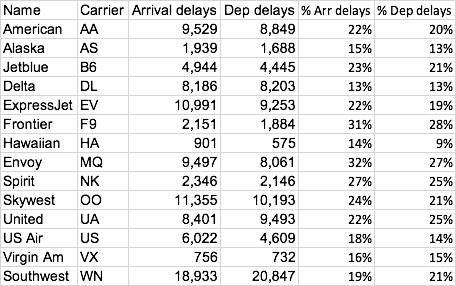

***
1(b) (Question): Take California. Which cities are the most concerned? And how about NY state?

1(b) (Response):

The bigger cities obviously have more delays. In California for example, LA had 3,024 arrival delays and 3,319 departure delays. San Fran had 2,850 arrival delays and 3,397 departure delays, while San Diego had 1,030 departure and 1,219 arrival delays, respectively. In New York, NYC had 4,625 arrival delays and 4,004 departure delays which was by far the most of any city. 

However, in terms of fraction of flights delayed, the same cities were not the worst. In California, LA only had 17% arrival delays and 19% departure delays, and San Diego had 17% and 20% arrival and departure delays. This is pretty consistent and even on the low end of most smaller cities in California. Although San Franciso was still on the high end with 22% and 26% arrival and departure delays, respectively. In New York, NYC had 26% and 22% arrival and depature delays which was actually on the average to low end compared with other cities in New York. Comparatively, Syracuse had 29% and 27% arrival and departure delays, and Niagra Falls had astoundingly high arrival delays with 42% (possibly since it is a tourism location?), while departure delays were normal at 19%. 



***
2(a) (Question): What is the likeliest cause of delays?

2(a) (Response):  

Late aircrafts were the most common cause of delays with 2,183,865 flights delays due to this, while carrier delays and national air system delays were the next most common with 1,708,155 and 1,278,055 delays, respectively.

***
2(b) (Question): Compare weekends and rest of the week

2(b) (Response):

I would have expected there to be clear differences between weekend and weekday flights, however, they are relatively similar.  Thursdays and Fridays have the most overall flights (Around 80k each), while Sundays had the least (around 60k). In terms of delays, Sundays actually had the highest arrival and departure delays as a percentage at 26% and 25% respectively. After that, Mondays had the highest at 24% and 23% arrival and departure delays. Tues, Weds, and Thurs had the lowest percentages of delays at between 16%-18% for any of them (departure or arrival). So I guess if I were to make a statement about an overall trend, it seems that mid-week (Tues-Thurs) flights have less delays than weekend/start/end of week flights (Fri-Mon) which were all basically over 20% delays. 

***
3 (Response):

1. Illinios had by far the most flight delays due to weather at 93,748! The next closest states were New York and California at around 22k apiece.

2. JetBlue and US Air had by far more security delays than any of the other airlines with over 1,000 apiece!

3. The 27th day of the month (across all months) has by far less delays than any other day, with only 874 arrival delays and 852 departure delays, whereas all other days are over 1,000 with some as high as 7,000.



# Submission

* Got to 'File' and download this notebook as .ipynb
* Rename it as **data\_processing\_[your uni].ipynb**
* Then submit it on courseworks
